**Notebook to illustrate the existence of limit cycles that are locally completely unstable and yet, are globally stable.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Defining a dynamical system with a limit cycle with the required properties.\
The dynamical system has been designed to have a limit cycle at r=1.**

In [39]:

def dynamic_system(init_pos, t, l1, l2, omega, k):
    
    #Cylinrical coordinates
    r = init_pos[0]
    
    y = init_pos[1]
    
    theta = init_pos[2]
    
    #Rotation Matrix
    R = np.matrix([[np.cos(omega*theta), -np.sin(omega*theta)], [np.sin(omega*theta), np.cos(omega*theta)]])    
    
    #Dynamical System
    A = R@np.matrix([[l1, 0],[0, l2]])@np.linalg.inv(R)
        
    r_dot = A[0,0]*(r-1)+A[0,1]*y
    
    y_dot = A[1,0]*(r-1)+A[1,1]*y

    theta_dot = k*(1+np.sin(theta)**2)
    
    return r_dot,y_dot,theta_dot

**Choosing parameters of the dynamical system that causes it to exhibit globally stable dynamics**

In [55]:
# Eigenvalues controlling x-y dynamics:

# EV1<0
l1 = -1.1
# EV2>0
l2 = 0.1

# Speed along the z-axis
k = 0.01

**Case1: With omega<<omega_cr where omega_cr is approximately 22.4686859(refer paper).\
The trajectory diverges from the limit cycle at r=1(Unstable Limit Cycle).**

Text(0.5, 0.5, 'Z')

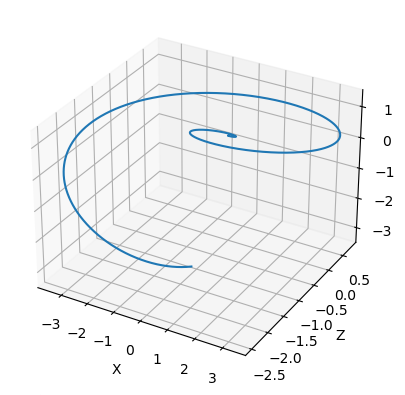

In [66]:

omega = 10
#Integration time
t = np.linspace(1, 1000, 100000)

#Integrating 4 different initial conditions
init_pos = [1.1, 0.1, 0]
#Numerical Integration
pos= odeint(dynamic_system, init_pos, t, args=(l1, l2, omega, k), rtol=10**-10, atol=10**-10)

#Plotting
r = pos[:,0]
y = pos[:,1]
theta = pos[:,2]

x = r * np.cos(theta)
z = r * np.sin(theta)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, z, y)
plt.xlabel('X')
plt.ylabel('Z')

**Case 2 with omega~omega_cr where omega_cr is approximately 22.4686859(refer paper)\
The limit cycle no longer diverges, but does not converge either and remains bounded in distance from r=1.**

Text(0.5, 0.5, 'Z')

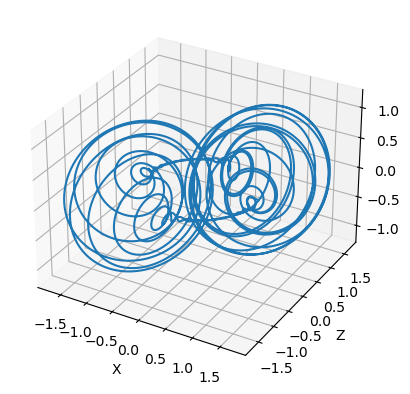

In [65]:

omega = 22.4686
#Integration time
t = np.linspace(1, 1000, 100000)

#Integrating 4 different initial conditions
init_pos = [1.1, 0.1, 0]
#Numerical Integration
pos= odeint(dynamic_system, init_pos, t, args=(l1, l2, omega, k), rtol=10**-10, atol=10**-10)

#Plotting
r = pos[:,0]
y = pos[:,1]
theta = pos[:,2]

x = r * np.cos(theta)
z = r * np.sin(theta)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, z, y)
plt.xlabel('X')
plt.ylabel('Z')

**Case 3 with \omega>omega_cr where omega_cr is approximately 22.4686859(refer paper).\
The limit cycle has been rendered globally attracting to trajectories despite being unstable at every point on r=1, y=0.**

Text(0.5, 0.5, 'Z')

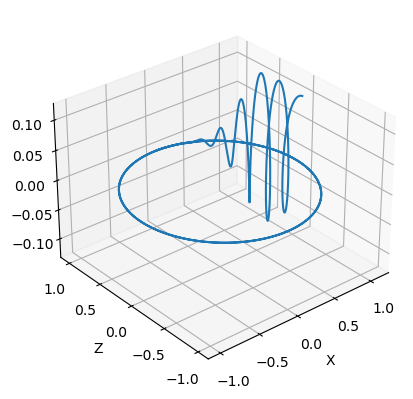

In [64]:

omega = 30
#Integration time
t = np.linspace(1, 1000, 100000)

#Integrating 4 different initial conditions
init_pos = [1.1, 0.1, 0]

#Numerical Integration
pos= odeint(dynamic_system, init_pos, t, args=(l1, l2, omega, k), rtol=10**-10, atol=10**-10)

#Plotting
r = pos[:,0]
y = pos[:,1]
theta = pos[:,2]

x = r * np.cos(theta)
z = r * np.sin(theta)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, z, y)
ax.view_init(azim=230)
plt.xlabel('X')
plt.ylabel('Z')